In [2]:
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = 15, 5

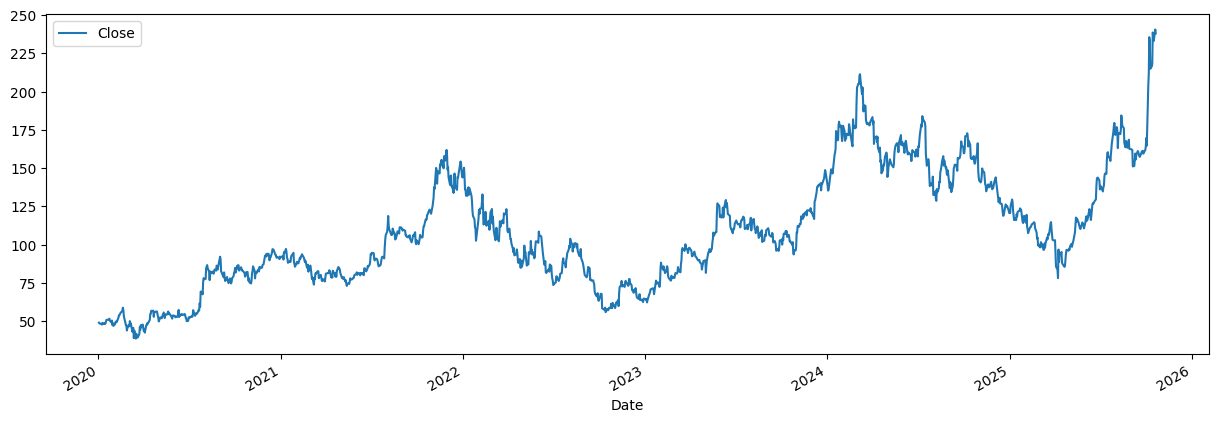

In [ ]:
AMD = yf.Ticker("AMD")

# getting the historical market data
AMD_values = AMD.history(start="2020-01-01")

# Plotting the close price of AMD
AMD_values[['Close']].plot()

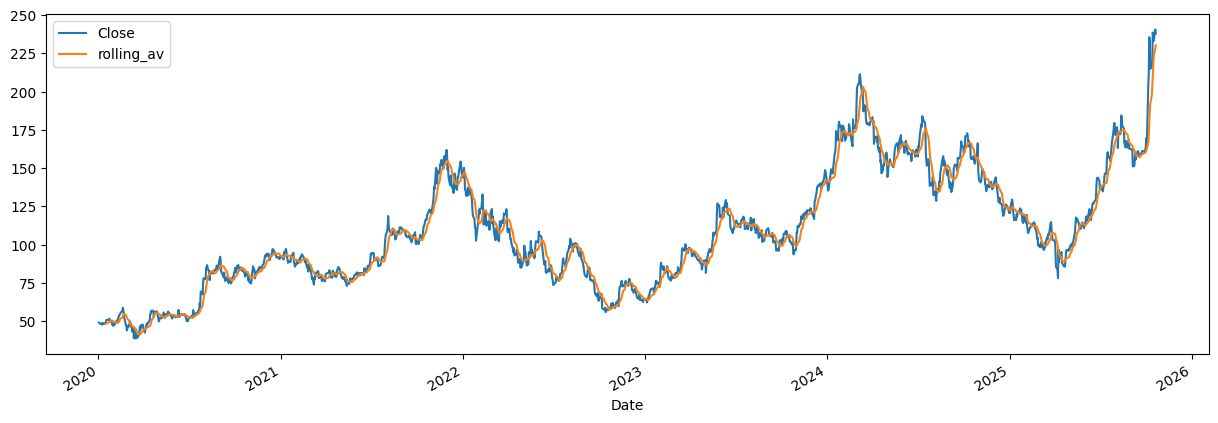

In [5]:
AMD_values['rolling_av'] = AMD_values['Close'].rolling(10).mean()

# plotting 10-day rolling average value with the closing value
AMD_values[['Close','rolling_av']].plot();

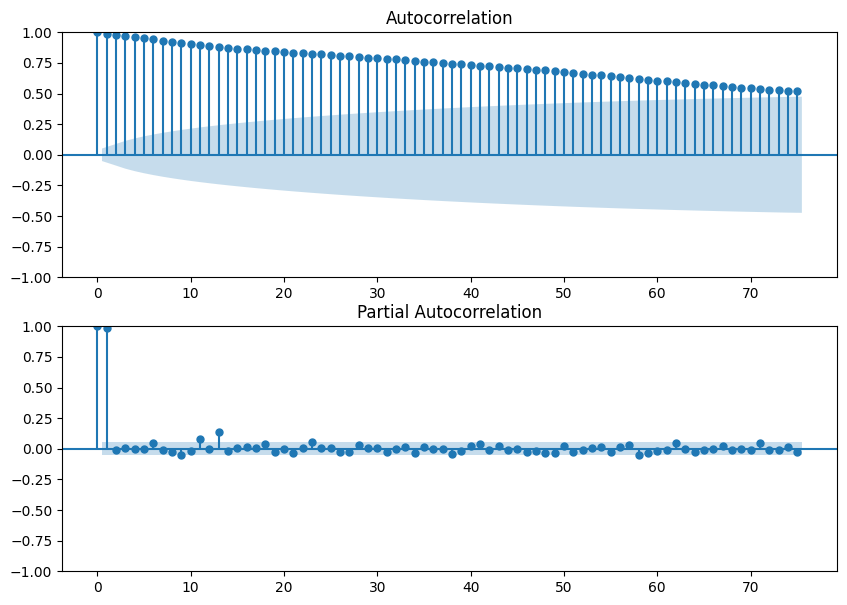

In [6]:
# Function to plot ACF and PACF
def plot_acf_pacf(timeseries):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    plot_acf(timeseries, ax=ax1, lags=75)
    plot_pacf(timeseries, ax=ax2, lags=75)
    plt.show()


# Plotting ACF and PACF of the closing value time series
plot_acf_pacf(AMD_values['Close'])

In [7]:
#creating the model
MA_model = ARIMA(AMD_values['Close'], order=(0, 0, 55))

#fitting data to the model
results = MA_model.fit()

#summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1459
Model:                ARIMA(0, 0, 55)   Log Likelihood               -6138.187
Date:                Wed, 22 Oct 2025   AIC                          12390.374
Time:                        17:37:03   BIC                          12691.648
Sample:                             0   HQIC                         12502.765
                               - 1459                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.8534      8.332     12.945      0.000      91.523     124.184
ma.L1          1.1463      0.562      2.039      0.041       0.045       2.248
ma.L2          1.3496      0.748      1.805      0.0

In [10]:
from statsmodels.tsa.ar_model import AutoReg

# Fit AR model (lag=3)
ar_model = AutoReg(AMD_values['Close'], lags=3)
ar_result = ar_model.fit()

# Print summary
print(ar_result.summary())

# Forecast next 5 steps
forecast_ar = ar_result.predict(start=len(AMD_values['Close']), end=len(AMD_values['Close'])+4)
print("AR Forecast:\n", forecast_ar)


                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1459
Model:                     AutoReg(3)   Log Likelihood               -4007.594
Method:               Conditional MLE   S.D. of innovations              3.794
Date:                Wed, 22 Oct 2025   AIC                           8025.187
Time:                        17:37:31   BIC                           8051.604
Sample:                             3   HQIC                          8035.043
                                 1459                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3442      0.306      1.125      0.261      -0.255       0.944
Close.L1       0.9863      0.026     37.646      0.000       0.935       1.038
Close.L2       0.0391      0.037      1.063      0.2

In [ ]:
# Fit ARMA(2,1) model
arma_model = ARIMA(data, order=(2,0,1))  # p=2, d=0, q=1
arma_result = arma_model.fit()

print(arma_result.summary())

# Forecast next 5 steps
forecast_arma = arma_result.forecast(steps=5)
print("ARMA Forecast:\n", forecast_arma)